In [21]:
%store -r data_cat

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
def showCatsBy(by,xlabel=''): #views
  if xlabel == '': xlabel = by 
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  catplot = sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow')
  catplot.set(title= xlabel +' por Categoría', ylabel="Categoría", xlabel=xlabel)

In [24]:
def correct_outliers_cats(col, q_min=0.025, q_max=0.95):
  outliers = data_cat.groupby('snippet.title').agg(
      out_min = (col, lambda x : x.quantile(q_min)),
      out_max = (col, lambda x : x.quantile(q_max))
    )
  outliers.reset_index(inplace=True)
  display(outliers)
  

  for index, row in outliers.iterrows():
    cat, omin, omax = row

    nCat = len(data_cat[data_cat['snippet.title'] == cat])
    nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
    nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])
    print( f"{cat} por {col}".upper() )
    print( f'Frecuencia: {nCat} \t f. outliers min: {nCatOutMin} \t f. outliers max: {nCatOutMax}' )

    #corrigiendo outliers máximos
    if (nCatOutMax > 0):
      data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>omax), col ] = [omax]*nCatOutMax
    #corrigiendo outliers mínimos
    if (nCatOutMin > 0):
      data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]<omin), col ] = [omin]*nCatOutMin
    

## 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

### Corrigiendo outliers de Views por categoría

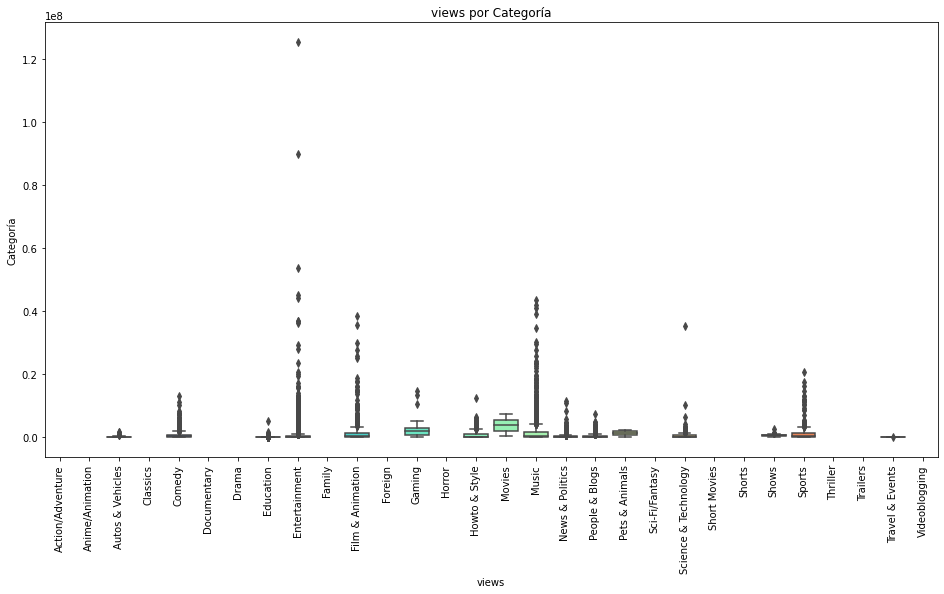

In [25]:
showCatsBy('views')

In [26]:
correct_outliers_cats('views')

,snippet.title,out_min,out_max
0,Action/Adventure,NaN,NaN
1,Anime/Animation,NaN,NaN
2,Autos & Vehicles,41684.70,1402924.50
3,Classics,NaN,NaN
4,Comedy,31233.60,2247607.00
5,Documentary,NaN,NaN
6,Drama,NaN,NaN
7,Education,13505.30,338599.80
8,Entertainment,26627.00,1692639.00
9,Family,NaN,NaN


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21640\3351928774.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21640\3351928774.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])


ACTION/ADVENTURE POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
ANIME/ANIMATION POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
AUTOS & VEHICLES POR VIEWS
Frecuencia: 34 	 f. outliers min: 1 	 f. outliers max: 2
CLASSICS POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
COMEDY POR VIEWS
Frecuencia: 1152 	 f. outliers min: 29 	 f. outliers max: 58
DOCUMENTARY POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
DRAMA POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
EDUCATION POR VIEWS
Frecuencia: 813 	 f. outliers min: 21 	 f. outliers max: 41
ENTERTAINMENT POR VIEWS
Frecuencia: 7781 	 f. outliers min: 195 	 f. outliers max: 389
FAMILY POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
FILM & ANIMATION POR VIEWS
Frecuencia: 539 	 f. outliers min: 14 	 f. outliers max: 27
FOREIGN POR VIEWS
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
GAMING POR VIEWS
Frecuencia: 22 	 f. outliers m

[Text(0.5, 1.0, 'Vistas por Categoría'),
 Text(0, 0.5, 'Categoría'),
 Text(0.5, 0, 'Vistas')]

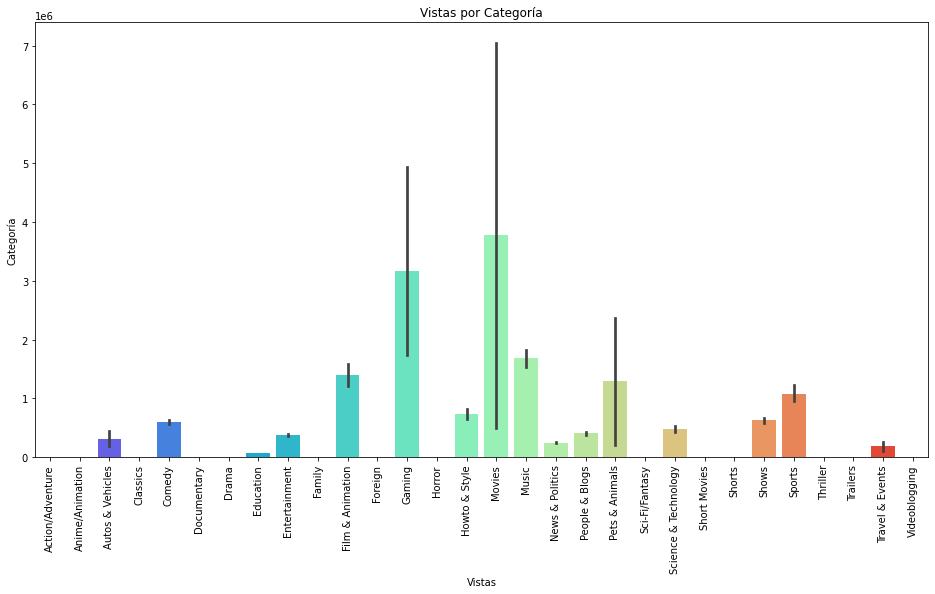

In [27]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="views", data=data_cat, palette='rainbow').set(
  title='Vistas por Categoría', ylabel="Categoría", xlabel='Vistas')

### Corrigiendo outliers de Cantidad de Comentarios por categoría

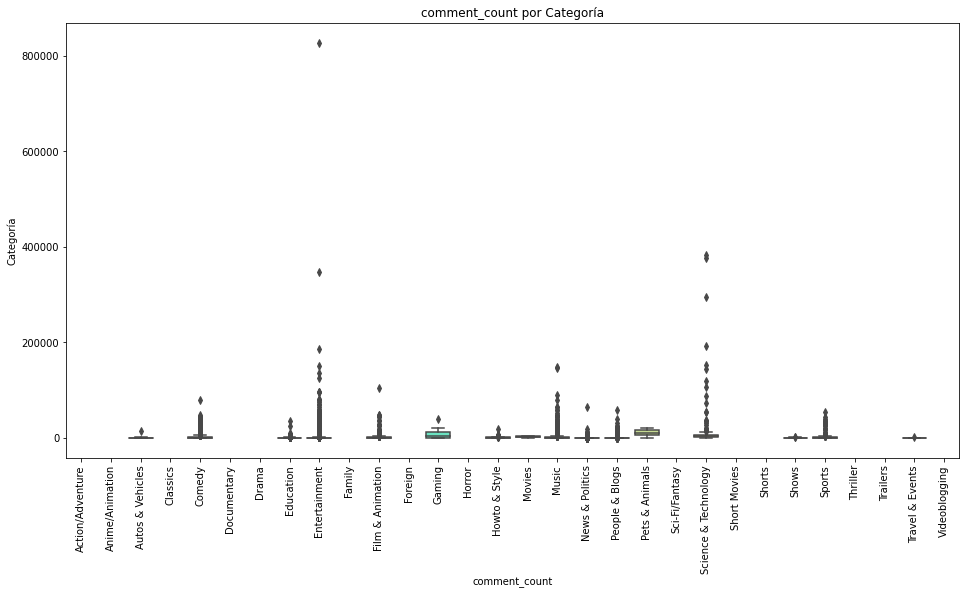

In [28]:
showCatsBy('comment_count')

In [29]:
correct_outliers_cats('comment_count')

,snippet.title,out_min,out_max
0,Action/Adventure,NaN,NaN
1,Anime/Animation,NaN,NaN
2,Autos & Vehicles,0.000,1227.95
3,Classics,NaN,NaN
4,Comedy,79.775,11595.95
5,Documentary,NaN,NaN
6,Drama,NaN,NaN
7,Education,0.000,2041.00
8,Entertainment,0.000,2815.00
9,Family,NaN,NaN


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21640\3351928774.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21640\3351928774.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])


ACTION/ADVENTURE POR COMMENT_COUNT
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
ANIME/ANIMATION POR COMMENT_COUNT
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
AUTOS & VEHICLES POR COMMENT_COUNT
Frecuencia: 34 	 f. outliers min: 0 	 f. outliers max: 2
CLASSICS POR COMMENT_COUNT
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
COMEDY POR COMMENT_COUNT
Frecuencia: 1152 	 f. outliers min: 29 	 f. outliers max: 58
DOCUMENTARY POR COMMENT_COUNT
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
DRAMA POR COMMENT_COUNT
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
EDUCATION POR COMMENT_COUNT
Frecuencia: 813 	 f. outliers min: 0 	 f. outliers max: 41
ENTERTAINMENT POR COMMENT_COUNT
Frecuencia: 7781 	 f. outliers min: 0 	 f. outliers max: 389
FAMILY POR COMMENT_COUNT
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
FILM & ANIMATION POR COMMENT_COUNT
Frecuencia: 539 	 f. outliers min: 0 	 f. outliers max: 27
FOREIGN POR COMMENT_COUNT
Frecuencia:

[Text(0.5, 1.0, 'Cantidad de Comentarios por Categoría'),
 Text(0, 0.5, 'Categoría'),
 Text(0.5, 0, 'Cantidad de Comentarios')]

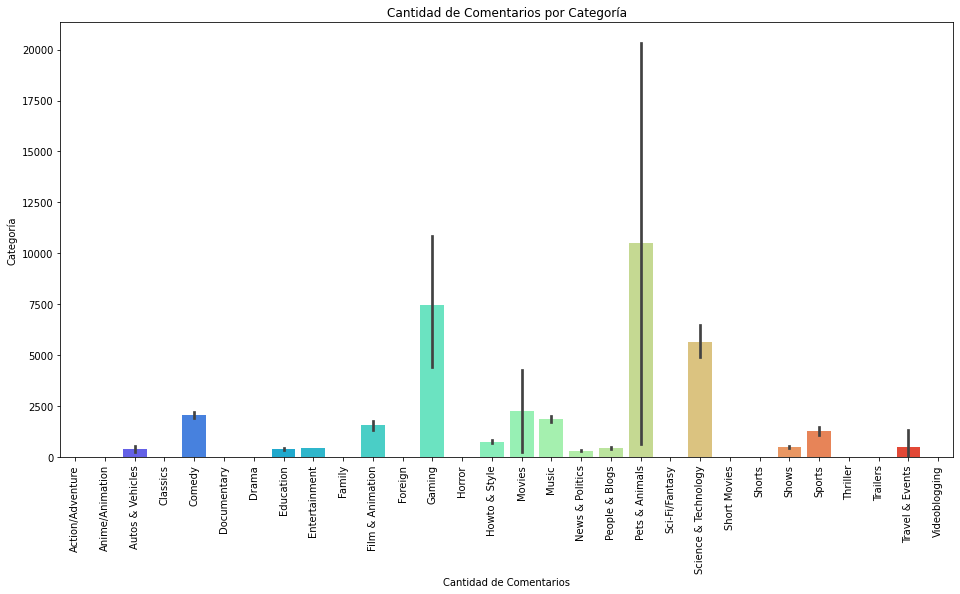

In [30]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="comment_count", data=data_cat, palette='rainbow').set(
  title='Cantidad de Comentarios por Categoría', ylabel="Categoría", xlabel='Cantidad de Comentarios')

### Ratio Vistas / “Comentarios (views / comment_count)

In [31]:
cat_vcratio = data_cat[['snippet.title','views','comment_count']]
cat_vcratio['ratio'] = data_cat['views'] / data_cat['comment_count']
cat_vcratio

C:\Users\GART-03\AppData\Local\Temp\ipykernel_21640\1932802276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_vcratio['ratio'] = data_cat['views'] / data_cat['comment_count']


,snippet.title,views,comment_count,ratio
0,Entertainment,1014376.00,1132.000,8.960919e+02
1,News & Politics,979069.40,1593.500,6.144144e+02
2,Entertainment,432700.00,227.000,1.906167e+03
3,Entertainment,454944.00,134.000,3.395104e+03
4,Education,29607.00,0.000,inf
...,...,...,...,...
16804,Howto & Style,17791.75,0.125,1.423340e+05
16805,Entertainment,97600.00,125.000,7.808000e+02
16806,Entertainment,58563.00,30.000,1.952100e+03
16807,Comedy,153387.00,1529.000,1.003185e+02


In [32]:
cat_vcratio.describe()

,views,comment_count,ratio
count,1.680900e+04,16809.000000,1.680900e+04
mean,5.232325e+05,810.526273,inf
std,1.030966e+06,1941.099247,NaN
min,9.808000e+03,0.000000,3.496255e+00
25%,8.918100e+04,49.000000,4.815625e+02
50%,2.068750e+05,198.000000,1.245004e+03
75%,5.299080e+05,715.000000,3.242781e+03
max,1.327448e+07,30375.300000,inf


In [33]:
cat_vcratio.groupby('snippet.title').describe()

views                                         \
                       count          mean           std        min   
snippet.title                                                         
Action/Adventure         0.0           NaN           NaN        NaN   
Anime/Animation          0.0           NaN           NaN        NaN   
Autos & Vehicles        34.0  3.132572e+05  3.891804e+05   41684.70   
Classics                 0.0           NaN           NaN        NaN   
Comedy                1152.0  5.925035e+05  6.126641e+05   31233.60   
Documentary              0.0           NaN           NaN        NaN   
Drama                    0.0           NaN           NaN        NaN   
Education              813.0  7.320320e+04  8.201000e+04   13505.30   
Entertainment         7781.0  3.783787e+05  4.318902e+05   26627.00   
Family                   0.0           NaN           NaN        NaN   
Film & Animation       539.0  1.397159e+06  2.177410e+06   39964.60   
Foreign                  0.0           NaN           NaN        NaN   
Gaming                  22.0  3.162088e+06  3.991603e+06   99988.90   
Horror                   0.0           NaN           NaN        NaN   
Howto & Style          486.0  7.375613e+05  9.530477e+05   17791.75   
Movies                   2.0  3.773778e+06  4.626218e+06  502548.25   
Music                 1278.0  1.681777e+06  2.566077e+06   36671.90   
News & Politics       2582.0  2.471153e+05  2.522520e+05   23009.30   
People & Blogs        1255.0  4.048767e+05  5.354546e+05   15823.15   
Pets & Animals           2.0  1.288201e+06  1.534776e+06  202950.20   
Sci-Fi/Fantasy           0.0           NaN           NaN        NaN   
Science & Technology   307.0  4.739126e+05  4.746017e+05   52037.30   
Short Movies             0.0           NaN           NaN        NaN   
Shorts                   0.0           NaN           NaN        NaN   
Shows                  123.0  6.304643e+05  2.557768e+05  111065.00   
Sports                 356.0  1.077022e+06  1.311064e+06   47896.25   
Thriller                 0.0           NaN           NaN        NaN   
Trailers                 0.0           NaN           NaN        NaN   
Travel & Events          4.0  1.925245e+05  8.190336e+04   79380.00   
Videoblogging            0.0           NaN           NaN        NaN   

                                                                            \
                               25%          50%           75%          max   
snippet.title                                                                
Action/Adventure               NaN          NaN           NaN          NaN   
Anime/Animation                NaN          NaN           NaN          NaN   
Autos & Vehicles      9.408725e+04   161174.500  2.733005e+05   1402924.50   
Classics                       NaN          NaN           NaN          NaN   
Comedy                1.242032e+05   353683.000  8.556552e+05   2247607.00   
Documentary                    NaN          NaN           NaN          NaN   
Drama                          NaN          NaN           NaN          NaN   
Education             2.753800e+04    46273.000  6.761400e+04    338599.80   
Entertainment         1.018580e+05   203408.000  4.597020e+05   1692639.00   
Family                         NaN          NaN           NaN          NaN   
Film & Animation      1.809850e+05   505652.000  1.494378e+06   8782927.20   
Foreign                        NaN          NaN           NaN          NaN   
Gaming                6.488975e+05  1912271.000  2.881281e+06  13274482.20   
Horror                         NaN          NaN           NaN          NaN   
Howto & Style         8.061550e+04   223991.000  1.091508e+06   3335660.00   
Movies                2.138163e+06  3773778.375  5.409393e+06   7045008.50   
Music                 2.139732e+05   567541.000  1.780410e+06   9685109.60   
News & Politics       8.123950e+04   149330.500  3.082372e+05    979069.40   
People & Blogs        5.465000e+04   1763

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


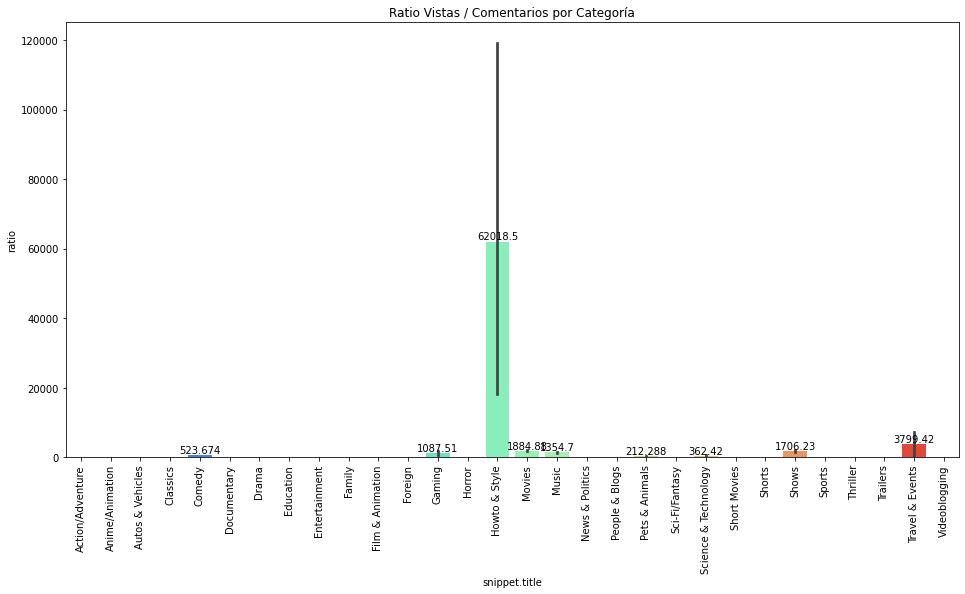

In [34]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
cat_vcratio_plot = sns.barplot(x="snippet.title", y="ratio", data=cat_vcratio, palette='rainbow')
cat_vcratio_plot.set(title='Ratio Vistas / Comentarios por Categoría')
for i in cat_vcratio_plot.containers: cat_vcratio_plot.bar_label(i,)

La categoría con mayor ratio Vistas / Comentarios es Howto & Style.

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


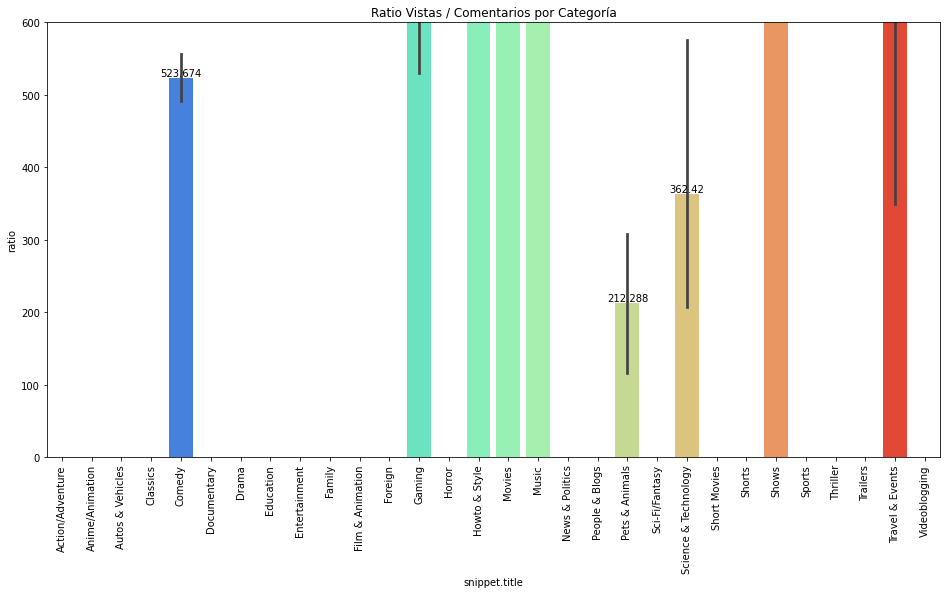

In [43]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
cat_vcratio_plot_min = sns.barplot(x="snippet.title", y="ratio", data=cat_vcratio, palette='rainbow')
cat_vcratio_plot_min.set(title='Ratio Vistas / Comentarios por Categoría')
cat_vcratio_plot_min.set(ylim=(0, 600))
for i in cat_vcratio_plot_min.containers: cat_vcratio_plot_min.bar_label(i,)

Las categorías con un ratio menos diferenciado son Pets & Animals y Science & Technology.

In [36]:
cat_vcratio_plot.figure.savefig("../graphs/ratio-views-comments_category.png")
cat_vcratio_plot_min.figure.savefig("../graphs/ratio-views-comments_category-zoom.png")

In [37]:
%store data_cat
%store cat_vcratio_plot

Stored 'data_cat' (DataFrame)
Stored 'cat_vcratio_plot' (AxesSubplot)
